In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import sklearn as sk
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
readmit_model1 = pd.read_csv(r'C:\Users\brthompson\bt_school\data\interim\readmit_model1.csv')
readmit_model2 = pd.read_csv(r'C:\Users\brthompson\bt_school\data\interim\secondmodel_readmit.csv')


In [3]:
readmit_model1.shape

(73490, 126)

In [4]:
readmit_model2.shape

(73490, 129)

In [5]:
#Split dependent and independent variables
Xad = readmit_model1.drop(['readmit'], 1) #Features
Yad = readmit_model1['readmit'] #Target variable
Xad.shape

(73490, 125)

In [6]:
Yad.shape

(73490,)

In [7]:
#Split the data into training and test, keep test set aside for testing of models. 
#Will perform cross validation on training set
X_train,X_test,y_train,y_test=train_test_split(Xad,Yad,test_size=0.25,random_state=0)


In [8]:
logreg = LogisticRegressionCV(cv=5)

In [9]:
def modelrun(model, xtrain, ytrain, xtest, ytest):
    start = time.time()
    model.fit(xtrain, ytrain)
    elapsed = time.time() - start
    print("Time to train",elapsed)
    y_pred=model.predict(xtest)
    print(' ')
    print("Confusion Matrix:",metrics.confusion_matrix(ytest, y_pred))
    print("Accuracy:",metrics.accuracy_score(ytest, y_pred))
    print("Precision:",metrics.precision_score(ytest, y_pred))
    print("Recall:",metrics.recall_score(ytest, y_pred))
    y_pred_proba = model.predict_proba(xtest)[::,1]
    fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
    auc = metrics.roc_auc_score(ytest, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    print('MCC:')
    print(matthews_corrcoef(ytest, y_pred))

In [15]:
def crossvalrun(model, xtrain, ytrain, xtest, ytest):
    start = time.time()
    model.fit(xtrain, ytrain)
    elapsed = time.time() - start
    print("Time to train",elapsed)
    y_pred=cross_val_predict(model, xtest, ytest, cv=3)
    print(' ')
    print("Confusion Matrix:",metrics.confusion_matrix(ytest, y_pred))
    print("Accuracy:",metrics.accuracy_score(ytest, y_pred))
    print("Precision:",metrics.precision_score(ytest, y_pred))
    print("Recall:",metrics.recall_score(ytest, y_pred))
    y_pred_proba = model.predict_proba(xtest)[::,1]
    fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
    auc = metrics.roc_auc_score(ytest, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    print('MCC:')
    print(matthews_corrcoef(ytest, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

Time to train 29.37988042831421
 
Confusion Matrix: [[8601 2236]
 [2636 4900]]
Accuracy: 0.7348282806291841
Precision: 0.6866591928251121
Recall: 0.6502123142250531


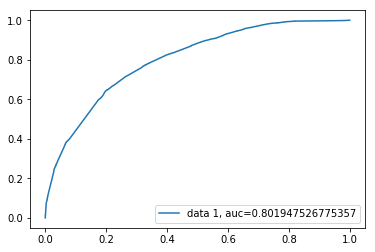

MCC:
0.44796084011550724


In [11]:
modelrun(model = logreg, xtrain=X_train, ytrain=y_train, xtest = X_test, ytest=y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

Time to train 27.656686305999756


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

 
Confusion Matrix: [[8612 2225]
 [2682 4854]]
Accuracy: 0.7329233113808306
Precision: 0.6856900692188163
Recall: 0.6441082802547771


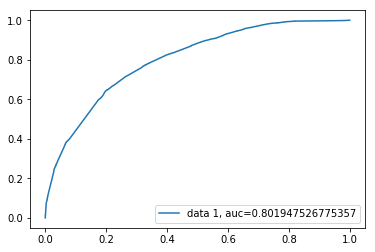

MCC:
0.4434809600040573


In [16]:
crossvalrun(model = logreg, xtrain=X_train, ytrain=y_train, xtest = X_test, ytest=y_test)

[(3, 0.6456213257246795)]
[(3, 0.6456213257246795), (4, 0.6493765166496062)]
[(3, 0.6456213257246795), (4, 0.6493765166496062), (5, 0.6617861616901578)]
[(3, 0.6456213257246795), (4, 0.6493765166496062), (5, 0.6617861616901578), (6, 0.6863333428148962)]
[(3, 0.6456213257246795), (4, 0.6493765166496062), (5, 0.6617861616901578), (6, 0.6863333428148962), (7, 0.7059274611851193)]
[(3, 0.6456213257246795), (4, 0.6493765166496062), (5, 0.6617861616901578), (6, 0.6863333428148962), (7, 0.7059274611851193), (8, 0.7155612106099647)]
[(3, 0.6456213257246795), (4, 0.6493765166496062), (5, 0.6617861616901578), (6, 0.6863333428148962), (7, 0.7059274611851193), (8, 0.7155612106099647), (9, 0.7179014948233748)]
[(3, 0.6456213257246795), (4, 0.6493765166496062), (5, 0.6617861616901578), (6, 0.6863333428148962), (7, 0.7059274611851193), (8, 0.7155612106099647), (9, 0.7179014948233748), (10, 0.7175204831997809)]
[(3, 0.6456213257246795), (4, 0.6493765166496062), (5, 0.6617861616901578), (6, 0.686333342

[(3, 0.6456213257246795), (4, 0.6493765166496062), (5, 0.6617861616901578), (6, 0.6863333428148962), (7, 0.7059274611851193), (8, 0.7155612106099647), (9, 0.7179014948233748), (10, 0.7175204831997809), (11, 0.7171392197848857), (12, 0.7180100421475815), (13, 0.7199694777010024), (14, 0.7207315306057775), (15, 0.7209490251803026), (16, 0.7218199956616913), (17, 0.7225276415943159), (18, 0.722908519960247), (19, 0.7230174671622112), (20, 0.7229085199683062), (21, 0.7226908625027083), (22, 0.7231264291929687), (23, 0.7231264143883526), (24, 0.7231808213524439), (25, 0.7236707061468626), (26, 0.7236706617088369), (27, 0.7242694640959872), (28, 0.7244870030843609)]
[(3, 0.6456213257246795), (4, 0.6493765166496062), (5, 0.6617861616901578), (6, 0.6863333428148962), (7, 0.7059274611851193), (8, 0.7155612106099647), (9, 0.7179014948233748), (10, 0.7175204831997809), (11, 0.7171392197848857), (12, 0.7180100421475815), (13, 0.7199694777010024), (14, 0.7207315306057775), (15, 0.7209490251803026),

[(3, 0.6456213257246795), (4, 0.6493765166496062), (5, 0.6617861616901578), (6, 0.6863333428148962), (7, 0.7059274611851193), (8, 0.7155612106099647), (9, 0.7179014948233748), (10, 0.7175204831997809), (11, 0.7171392197848857), (12, 0.7180100421475815), (13, 0.7199694777010024), (14, 0.7207315306057775), (15, 0.7209490251803026), (16, 0.7218199956616913), (17, 0.7225276415943159), (18, 0.722908519960247), (19, 0.7230174671622112), (20, 0.7229085199683062), (21, 0.7226908625027083), (22, 0.7231264291929687), (23, 0.7231264143883526), (24, 0.7231808213524439), (25, 0.7236707061468626), (26, 0.7236706617088369), (27, 0.7242694640959872), (28, 0.7244870030843609), (29, 0.7248681183886222), (30, 0.7251946786342767), (31, 0.7248135929473066), (32, 0.7247047494098916), (33, 0.7247047494098916), (34, 0.7247593192731145), (35, 0.7246504313057331), (36, 0.7248681628105296), (37, 0.724977021168679), (38, 0.7249769767387124), (39, 0.7251947082596272)]
[(3, 0.6456213257246795), (4, 0.64937651664960

[(3, 0.6456213257246795), (4, 0.6493765166496062), (5, 0.6617861616901578), (6, 0.6863333428148962), (7, 0.7059274611851193), (8, 0.7155612106099647), (9, 0.7179014948233748), (10, 0.7175204831997809), (11, 0.7171392197848857), (12, 0.7180100421475815), (13, 0.7199694777010024), (14, 0.7207315306057775), (15, 0.7209490251803026), (16, 0.7218199956616913), (17, 0.7225276415943159), (18, 0.722908519960247), (19, 0.7230174671622112), (20, 0.7229085199683062), (21, 0.7226908625027083), (22, 0.7231264291929687), (23, 0.7231264143883526), (24, 0.7231808213524439), (25, 0.7236707061468626), (26, 0.7236706617088369), (27, 0.7242694640959872), (28, 0.7244870030843609), (29, 0.7248681183886222), (30, 0.7251946786342767), (31, 0.7248135929473066), (32, 0.7247047494098916), (33, 0.7247047494098916), (34, 0.7247593192731145), (35, 0.7246504313057331), (36, 0.7248681628105296), (37, 0.724977021168679), (38, 0.7249769767387124), (39, 0.7251947082596272), (40, 0.7243238266301122), (41, 0.7253580772383

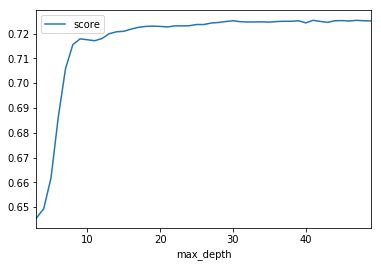

In [17]:
#Now conduct decision tree model
#Use cross-validation for hyperparamter tuning - choose the best max_depth
depth = []
for i in range(3, 50):

    clf = DecisionTreeClassifier(max_depth=i) 
    scores = cross_val_score(estimator=clf, X = X_test, y = y_test, cv = 5, n_jobs = 4)
    depth.append((i, scores.mean()))
print(depth)
pd.DataFrame(depth, columns = ['max_depth', 'score']).set_index('max_depth').plot()
#For initial set of variables, stabilized around 20
#Closer to 15 for larger set of variables

In [18]:
clf_tree = DecisionTreeClassifier(max_depth=15) 

Time to train 0.5971393585205078
 
Confusion Matrix: [[8395 2442]
 [2691 4845]]
Accuracy: 0.7206226528057476
Precision: 0.6648826677645121
Recall: 0.6429140127388535


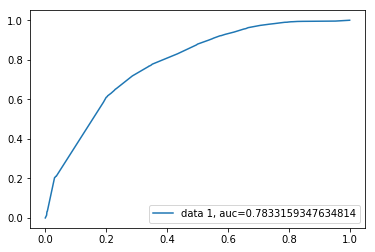

MCC:
0.41985327200609845


In [19]:
modelrun(model = clf_tree, xtrain=X_train, ytrain=y_train, xtest = X_test, ytest=y_test)

Time to train 0.451740026473999
 
Confusion Matrix: [[8544 2293]
 [2807 4729]]
Accuracy: 0.7224187666684809
Precision: 0.6734548561663344
Recall: 0.6275212314225053


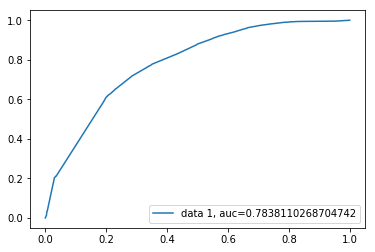

MCC:
0.4210165023954623


In [20]:
crossvalrun(model = clf_tree, xtrain=X_train, ytrain=y_train, xtest = X_test, ytest=y_test)

[(50, 0.7276437175815829)]
[(50, 0.7276437175815829), (60, 0.7275352442482202)]
[(50, 0.7276437175815829), (60, 0.7275352442482202), (70, 0.7275348888568431)]
[(50, 0.7276437175815829), (60, 0.7275352442482202), (70, 0.7275348888568431), (80, 0.727045477939085)]
[(50, 0.7276437175815829), (60, 0.7275352442482202), (70, 0.7275348888568431), (80, 0.727045477939085), (90, 0.7282424755548851)]
[(50, 0.7276437175815829), (60, 0.7275352442482202), (70, 0.7275348888568431), (80, 0.727045477939085), (90, 0.7282424755548851), (100, 0.727861597197013)]
[(50, 0.7276437175815829), (60, 0.7275352442482202), (70, 0.7275348888568431), (80, 0.727045477939085), (90, 0.7282424755548851), (100, 0.727861597197013), (110, 0.7282971786918894)]
[(50, 0.7276437175815829), (60, 0.7275352442482202), (70, 0.7275348888568431), (80, 0.727045477939085), (90, 0.7282424755548851), (100, 0.727861597197013), (110, 0.7282971786918894), (120, 0.728351585672099)]
[(50, 0.7276437175815829), (60, 0.7275352442482202), (70, 0

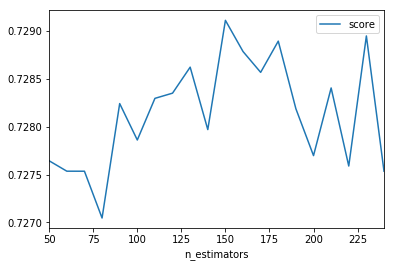

In [21]:
#now run random forest
#Start by performing grid search with cross validation to determine maxmimum number of estimators and sample split
estimators = []
for i in range(50, 250, 10):

    clf = RandomForestClassifier(n_estimators=i, criterion = 'entropy') 
    scores = cross_val_score(estimator=clf, X = X_test, y = y_test, cv = 5, n_jobs = 4)
    estimators.append((i, scores.mean()))
print(estimators)
pd.DataFrame(estimators, columns = ['n_estimators', 'score']).set_index('n_estimators').plot()
#Not much difference in number of estimators. Use 50

[(80, 0.7302561403525314)]
[(80, 0.7302561403525314), (90, 0.7304738422480956)]
[(80, 0.7302561403525314), (90, 0.7304738422480956), (100, 0.7321066879305117)]
[(80, 0.7302561403525314), (90, 0.7304738422480956), (100, 0.7321066879305117), (110, 0.7305283973147618)]
[(80, 0.7302561403525314), (90, 0.7304738422480956), (100, 0.7321066879305117), (110, 0.7305283973147618), (120, 0.7302562440170806)]
[(80, 0.7302561403525314), (90, 0.7304738422480956), (100, 0.7321066879305117), (110, 0.7305283973147618), (120, 0.7302562440170806), (130, 0.7319435707108457)]
[(80, 0.7302561403525314), (90, 0.7304738422480956), (100, 0.7321066879305117), (110, 0.7305283973147618), (120, 0.7302562440170806), (130, 0.7319435707108457), (140, 0.7312901540385648)]
[(80, 0.7302561403525314), (90, 0.7304738422480956), (100, 0.7321066879305117), (110, 0.7305283973147618), (120, 0.7302562440170806), (130, 0.7319435707108457), (140, 0.7312901540385648), (150, 0.7302560219075437)]
[(80, 0.7302561403525314), (90, 0.7

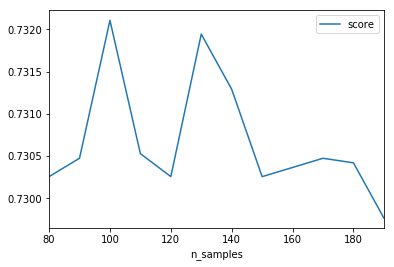

In [22]:
#Repeat for number of min samples
samples=[]
for i in range(80, 200, 10):

    clf = RandomForestClassifier(n_estimators=50, criterion = 'entropy', min_samples_split = i) 
    scores = cross_val_score(estimator=clf, X = X_test, y = y_test, cv = 5, n_jobs = 4)
    samples.append((i, scores.mean()))
print(samples)
pd.DataFrame(samples, columns = ['n_samples', 'score']).set_index('n_samples').plot()
#Best around 110

In [23]:
clf_forest = RandomForestClassifier(n_estimators=50, criterion = 'entropy', min_samples_split = 110)

Time to train 5.894496440887451
 
Confusion Matrix: [[8621 2216]
 [2651 4885]]
Accuracy: 0.7351004190932346
Precision: 0.6879312772848895
Recall: 0.6482218683651805


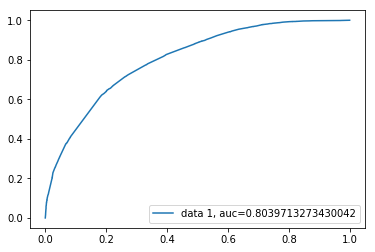

MCC:
0.44821935421037173


In [24]:
modelrun(model = clf_forest, xtrain=X_train, ytrain=y_train, xtest = X_test, ytest=y_test)

Time to train 5.386345863342285
 
Confusion Matrix: [[8725 2112]
 [2876 4660]]
Accuracy: 0.7285146682632123
Precision: 0.6881275841701122
Recall: 0.6183651804670913


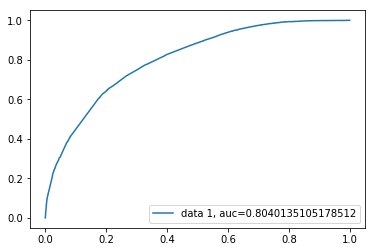

MCC:
0.4317664821243358


In [25]:
crossvalrun(model = clf_forest, xtrain=X_train, ytrain=y_train, xtest = X_test, ytest=y_test)

In [27]:
##Now repeat entire process for second set of models (includes social data)
Xad2 = readmit_model2.drop(['readmit'], 1) #Features
Yad2 = readmit_model2['readmit'] #Target variable
Xad2.shape, Yad2.shape

((73490, 128), (73490,))

In [28]:
X_train2,X_test2,y_train2,y_test2=train_test_split(Xad2,Yad2,test_size=0.25,random_state=0)

Time to train 4.394651174545288
 
Confusion Matrix: [[9688 1149]
 [5402 2134]]
Accuracy: 0.6434441844010232
Precision: 0.6500152299725861
Recall: 0.28317409766454354


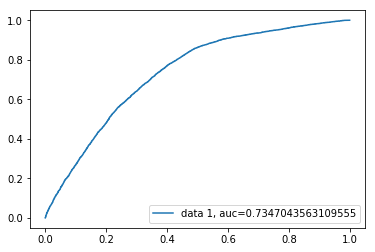

MCC:
0.22744807436241227


In [29]:
modelrun(model =logreg, xtrain=X_train2, ytrain=y_train2, xtest = X_test2, ytest=y_test2)

Time to train 4.610194206237793
 
Confusion Matrix: [[9404 1433]
 [4980 2556]]
Accuracy: 0.6509552060088173
Precision: 0.6407620957633492
Recall: 0.339171974522293


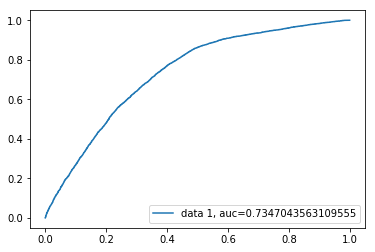

MCC:
0.24688639932489562


In [30]:
crossvalrun(model =logreg, xtrain=X_train2, ytrain=y_train2, xtest = X_test2, ytest=y_test2)

Time to train 0.6819911003112793
 
Confusion Matrix: [[8794 2043]
 [2206 5330]]
Accuracy: 0.7687367332498776
Precision: 0.722907907229079
Recall: 0.707271762208068


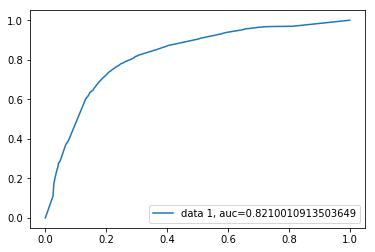

MCC:
0.5205535713003587


In [31]:
modelrun(model =clf_tree, xtrain=X_train2, ytrain=y_train2, xtest = X_test2, ytest=y_test2)

Time to train 0.6805915832519531
 
Confusion Matrix: [[8527 2310]
 [2195 5341]]
Accuracy: 0.7548032438904915
Precision: 0.6980786825251601
Recall: 0.7087314225053079


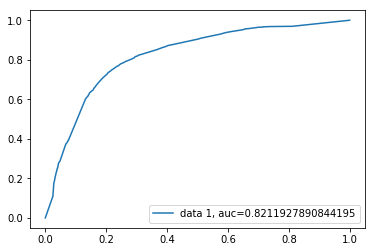

MCC:
0.4944648680234344


In [32]:
crossvalrun(model =clf_tree, xtrain=X_train2, ytrain=y_train2, xtest = X_test2, ytest=y_test2)

Time to train 7.087646245956421
 
Confusion Matrix: [[8968 1869]
 [2086 5450]]
Accuracy: 0.7847384749360474
Precision: 0.7446372455253449
Recall: 0.7231953290870489


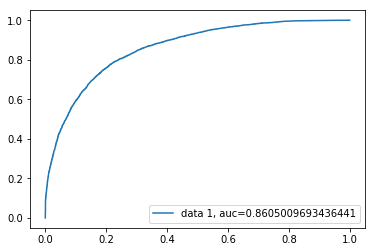

MCC:
0.5533228499071274


In [33]:
modelrun(model =clf_forest, xtrain=X_train2, ytrain=y_train2, xtest = X_test2, ytest=y_test2)

Time to train 7.213401556015015
 
Confusion Matrix: [[8961 1876]
 [2192 5344]]
Accuracy: 0.778588145648506
Precision: 0.7401662049861496
Recall: 0.7091295116772823


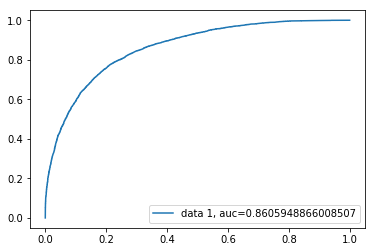

MCC:
0.5398096106021364


In [34]:
crossvalrun(model =clf_forest, xtrain=X_train2, ytrain=y_train2, xtest = X_test2, ytest=y_test2)